<a href="https://colab.research.google.com/github/fangya18/Data-science/blob/master/amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# authenticate Bigquery and Google Drive
from google.colab import auth
auth.authenticate_user()

# mount your drive
from google.colab import drive
drive.mount('/content/drive')
cd drive/MyDrive/a/

Mounted at /content/drive


**Load Packagaes**

In [4]:
import numpy as np
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.linear_model import LinearRegression
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download("punkt")

In [5]:
df= pd.read_csv("drug2024.csv")

In [6]:
df.head()

,Unnamed: 0,link,fsa,name,price,size,image_url,brand,special_feature,item_dimension,...,manufacturer,asin,origin_country,ingredients,about,description,safety,directions,legal,cat
0,0,https://www.amazon.com/Basic-Care-Daytime-Nigh...,FSA or HSA eligible,"Cold and Flu Relief, Daytime and Nighttime Com...",$12.74,48 Count (Pack of 1),https://m.media-amazon.com/images/I/71Yn2+VQcC...,Amazon Basic Care,Non Drowsy,4.38 x 2 x 3.25 inches,...,Perrigo Company - Basic Care,B07BQKPMFM,Canada,Daytime Cold & Flu: Active ingredients (in eac...,\n About this item ACTIVE INGREDIENTS: Com...,\n Compare to the active ingredients in Vicks...,Safety Information Daytime/Nighttime Cold & Fl...,Directions Daytime Cold & Flu Directions: take...,Legal Disclaimer Statements regarding dietary ...,cold
1,1,https://www.amazon.com/TYLENOL-Symptom-Relief-...,FSA or HSA eligible,"Cold + Flu Severe Medicine Caplets for Fever, ...",$7.66,24 Count (Pack of 1),https://m.media-amazon.com/images/I/81ZPNR2nA-...,Tylenol,Targeted,0.79 x 4.52 x 2.91 inches,...,Johnson & Johnson,B009ITR4EY,Italy,Active ingredients (in each caplet) Acetaminop...,\n About this item 24-count of Tylenol Col...,\n Product Description Experience temporary...,Safety Information Liver warning: This product...,Directions Important: Read all product informa...,Legal Disclaimer Statements regarding dietary ...,cold
2,2,https://www.amazon.com/Mucinex-Fast-Max-Streng...,FSA or HSA eligible,Fast-Max Maximum Strength Cold & Flu Day and N...,$15.34,24 Count (Pack of 1),https://m.media-amazon.com/images/I/81l8CSZQAO...,Mucinex,Information already added,1.73 x 3.54 x 4.92 inches,...,Reckitt Benckiser Healthcare,B013Q8JZVM,United Kingdom,Active Ingredients: (Mucinex Fast-Max Day Seve...,\n About this item MAXIMUM STRENGTH MUCINE...,\n Maximum Strength Mucinex Fast-Max Day and ...,NaN,NaN,Legal Disclaimer Statements regarding dietary ...,cold
3,3,https://www.amazon.com/Amazon-Basic-Care-Night...,FSA or HSA eligible,"Night Time Cold & Flu Liquid, Cherry, 12 Fl Oz...",$7.99,12 Fl Oz (Pack of 1),https://m.media-amazon.com/images/I/71BW4K0jaU...,Amazon Basic Care,NaN,2.5 x 2.5 x 7.25 inches,...,PERRIGO COMPANY,B074F297S8,USA,Active ingredients (in each 30 mL): Acetaminop...,\n About this item ACTIVE INGREDIENTS: Act...,\n Compare to Vicks NyQuil Cold & Flu active ...,Safety Information Liver warning: This product...,Directions Take only as directed – see overdos...,Legal Disclaimer Statements regarding dietary ...,cold
4,4,https://www.amazon.com/Theraflu-ExpressMax-Day...,FSA or HSA eligible,"ExpressMax Severe Cold and Cough Medicine, Day...",$12.98,8.3 Fl Oz (Pack of 2),https://m.media-amazon.com/images/I/91sQHZpElF...,Theraflu,NaN,1.63 x 5.75 x 6 inches,...,GlaxoSmithKline,B011VX2FGQ,USA,Theraflu ExpressMax Daytime Severe Cold & Coug...,\n About this item Package contains one 8....,\n Theraflu ExpressMax Severe Cold and Cough ...,NaN,Directions 30 mL of the cold and cough syrup c...,Legal Disclaimer Satisfaction Guarantee If for...,cold


In [7]:
column_names = df.columns
print(column_names)

Index(['Unnamed: 0', 'link', 'fsa', 'name', 'price', 'size', 'image_url',
       'brand', 'special_feature', 'item_dimension', 'product_benefit',
       'special_use', 'item_weight', 'reviews', 'rating', '5 star', '4 star',
       '3 star', '2 star', '1 star', 'discontinued', 'product_dimension',
       'model_number', 'first_date', 'manufacturer', 'asin', 'origin_country',
       'ingredients', 'about', 'description', 'safety', 'directions', 'legal',
       'cat'],
      dtype='object')


## 1. Desription

In [22]:
# Download NLTK stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
# Set of English stopwords
stop_words = set(stopwords.words('english'))


In [9]:
des50=df['description'].value_counts().head(30)
print(des50)

 \n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [14]:
df["description"] = df["description"].str.lower()

In [15]:
words = df["description"].str.split().explode()


In [16]:
# Remove punctuation
words = words.str.replace('[^\w\s]', '', regex=True)


In [24]:
# Filter out stopwords
filtered_words = words[~words.isin(stop_words)]

In [25]:
# Count the frequency of each word
word_freq = filtered_words.value_counts().head(40)
print(word_freq)

relief        2671
              2027
cold          1509
pain          1447
symptoms      1369
tablets       1159
allergy       1097
heartburn     1066
cough          903
medicine       837
nose           797
throat         790
1              790
congestion     777
acid           771
strength       769
flu            768
fever          756
use            658
nasal          654
take           640
hours          614
aches          610
children       589
years          579
contains       573
relieve        567
mg             566
minor          552
product        535
stomach        530
12             520
day            518
mucinex        495
headache       493
active         487
sore           483
fast           476
adults         461
runny          452
Name: description, dtype: int64


In [29]:
count = df["description"].str.count("max strength").sum()
count


22.0

In [31]:
count = df["description"].str.count("strength").sum()
count


824.0

In [62]:
count = df["description"].str.count("maximum strength").sum()
count


362.0

In [34]:
count = df["description"].str.count("non drowsy").sum()
count


22.0

In [37]:
count = df["description"].str.count("sleepy").sum()
count


11.0

In [38]:
count = df["description"].str.count("long").sum()
count


193.0

In [39]:
count = df["description"].str.count("fast").sum()
count


835.0

In [63]:
def find_special_des(text):
    if isinstance(text, float):
        # If the text is a float (e.g., NaN), return 0 for all features
        return 0, 0, 0, 0

    # Check for the presence of 'drowsy', 'fast', 'long', and 'max strength'
    non_drowsy = 1 if 'drowsy' in text.lower() else 0
    fast_acting = 1 if 'fast' in text.lower() else 0
    long_lasting = 1 if 'long'  in text.lower() or 'daytime and nighttime' in text.lower() else 0
    max_str = 1 if 'maximum strength' in text.lower() or 'max strength' in text.lower() else 0

    return non_drowsy, fast_acting, long_lasting, max_str


# Apply the function to the DataFrame
df[['non_drowsy_spec', 'fast_acting_spec', 'long_lasting_spec', 'max_str_spec']] = df['description'].apply(find_special_des).apply(pd.Series)

In [64]:
df[['description','non_drowsy_spec', 'fast_acting_spec', 'long_lasting_spec', 'max_str_spec']].head(30)

,description,non_drowsy_spec,fast_acting_spec,long_lasting_spec,max_str_spec
0,\n compare to the active ingredients in vicks...,1,0,1,0
1,\n product description experience temporary...,0,0,0,0
2,\n maximum strength mucinex fast-max day and ...,0,1,0,1
3,\n compare to vicks nyquil cold & flu active ...,0,0,0,0
4,\n theraflu expressmax severe cold and cough ...,0,1,1,1
5,\n compare to vicks nyquil active ingredients...,0,0,0,0
6,\n alka-seltzer plus cold & flu effervescent ...,0,1,0,0
7,\n from the world's #1 selling otc cough and ...,1,1,0,0
8,"\n experience temporary relief from fever, so...",0,0,0,0
9,\n knock your cold out with vicks dayquil and...,1,1,1,1


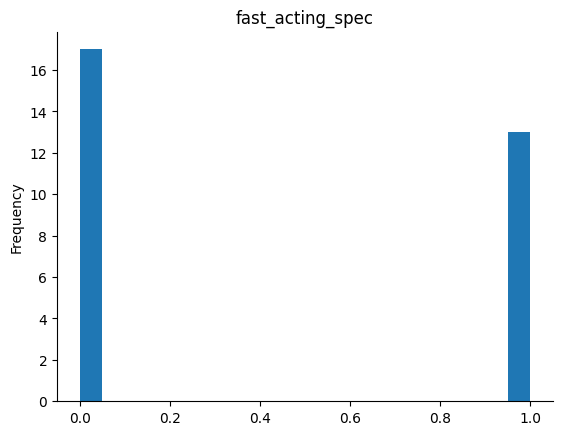

In [65]:
from matplotlib import pyplot as plt
_df_9['fast_acting_spec'].plot(kind='hist', bins=20, title='fast_acting_spec')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [54]:
df.shape

(2632, 38)

## 2. Safety

In [26]:
s50=df['safety'].value_counts().head(10)
print(s50)

Safety Information Do not use if you have ever had an allergic reaction to this product or any of its ingredients or to an antihistamine containing hydroxyzine. Ask a doctor before use if you have liver or kidney disease. Your doctor should determine if you need a different dose. Ask a doctor or pharmacist before use if you are taking tranquilizers or sedatives. When using this product Drowsiness may occur Avoid alcoholic drinks Alcohol, sedatives, and tranquilizers may increase drowsiness Be careful when driving a motor vehicle or operating machinery Stop use and ask a doctor if an allergic reaction to this product occurs. Seek medical help right away. If pregnant or breast-feeding: If breast-feeding: not recommended If pregnant: ask a health professional before use. Keep out of reach of children. In case of overdose, get medical help or contact a Poison Control Center right away. (1-800-222-1222)                                                                                         

In [27]:
df["safety"] = df["safety"].str.lower()
words = df["safety"].str.split().explode()
# Filter out stopwords
filtered_words = words[~words.isin(stop_words)]
# Count the frequency of each word
word_freq = filtered_words.value_counts().head(40)
print(word_freq)

use              2123
ask              1719
doctor           1675
may              1425
product           889
taking            848
medical           815
safety            741
information       731
•                 717
right             684
get               629
symptoms          627
pain              625
stomach           621
help              621
allergic          617
stop              558
drug              540
liver             539
using             537
severe            523
3                 518
contains          505
reach             503
children.         500
away.             496
keep              496
take              495
prescription      476
serious           460
heart             459
lasts             452
acetaminophen     445
reaction          445
pregnant          444
pharmacist        442
contact           441
skin              439
Name: safety, dtype: int64


In [10]:
df['special_feature'].value_counts()

Non Drowsy                                                      161
Fast-Acting                                                     141
Fast Acting                                                     115
Targeted                                                        100
Long Lasting                                                     81
                                                               ... 
Long-Lasting, Fast-Acting, Mucus Relief, Quick And Effective      1
Undiluted, Pure                                                   1
Quick-dissolving                                                  1
Homeopathic Echinacea 3X                                          1
Concentrated                                                      1
Name: special_feature, Length: 164, dtype: int64